In [1]:
# 02_error_patterns.ipynb
# Part 2: Error Pattern Analysis

# Imports and Setup
from utils import *

setup_plotting_style()
print_section_header("PART 2: ERROR PATTERN ANALYSIS")

# Load Data
df_models, df_class_stats, df_confusion = load_all_data()
pred_cols, all_classes = get_pred_columns(df_confusion)
total_models = df_confusion['model_name'].nunique()

print(f"Total Models: {total_models}")
print(f"Total Classes: {len(all_classes)}")


PART 2: ERROR PATTERN ANALYSIS
Total Models: 12
Total Classes: 38


In [2]:
# Build Error Frequency DataFrame
print_subsection_header("1. MISCLASSIFICATION PATTERNS")

df_errors = build_error_frequency_df(df_confusion, pred_cols)

# Aggregate by class pairs
df_pair_totals = df_errors.groupby(['True_Class', 'Predicted_Class'])['Count'].sum().reset_index()
df_pair_totals = df_pair_totals.sort_values('Count', ascending=False)

print("\nTOP 20 MOST CONFUSED PAIRS:")
print(df_pair_totals.head(20).to_string(index=False))


--------------------------------------------------------------------------------
1. MISCLASSIFICATION PATTERNS
--------------------------------------------------------------------------------

TOP 20 MOST CONFUSED PAIRS:
                                        True_Class                               Predicted_Class  Count
       True_Tomato___Tomato_Yellow_Leaf_Curl_Virus        Tomato___Tomato_Yellow_Leaf_Curl_Virus  12709
     True_Orange___Haunglongbing_(Citrus_greening)      Orange___Haunglongbing_(Citrus_greening)  12685
                            True_Soybean___healthy                             Soybean___healthy  12404
                      True_Tomato___Bacterial_spot                       Tomato___Bacterial_spot   5090
                       True_Peach___Bacterial_spot                        Peach___Bacterial_spot   5040
                         True_Tomato___Late_blight                          Tomato___Late_blight   4718
                      True_Squash___Powdery_mildew

In [3]:
# Systematic Errors Analysis
print_subsection_header("2. SYSTEMATIC ERRORS ANALYSIS")

error_model_count = df_errors.groupby(['True_Class', 'Predicted_Class']).agg({
    'Model': 'nunique',
    'Count': ['sum', 'mean', 'std']
}).reset_index()

error_model_count.columns = ['True_Class', 'Predicted_Class', 'Num_Models', 
                              'Total_Count', 'Avg_Count', 'Std_Count']
error_model_count['Model_Percentage'] = (error_model_count['Num_Models'] / total_models) * 100

# Categorize errors
hard_errors, moderate_errors, soft_errors = categorize_errors_by_frequency(
    error_model_count, total_models
)

hard_errors = hard_errors.sort_values('Total_Count', ascending=False)

print(f"\nSYSTEMATIC ERRORS (Made by ALL {total_models} models):")
print(f"Total: {len(hard_errors)} pairs")
print("\nTop 20:")
print(hard_errors[['True_Class', 'Predicted_Class', 'Total_Count']].head(20).to_string(index=False))

print(f"\nERROR DISTRIBUTION:")
print(f"  - Hard errors (100%): {len(hard_errors)}")
print(f"  - Moderate errors (75-99%): {len(moderate_errors)}")
print(f"  - Soft errors (<75%): {len(soft_errors)}")


--------------------------------------------------------------------------------
2. SYSTEMATIC ERRORS ANALYSIS
--------------------------------------------------------------------------------

SYSTEMATIC ERRORS (Made by ALL 12 models):
Total: 41 pairs

Top 20:
                                        True_Class                               Predicted_Class  Total_Count
       True_Tomato___Tomato_Yellow_Leaf_Curl_Virus        Tomato___Tomato_Yellow_Leaf_Curl_Virus        12709
     True_Orange___Haunglongbing_(Citrus_greening)      Orange___Haunglongbing_(Citrus_greening)        12685
                            True_Soybean___healthy                             Soybean___healthy        12404
                      True_Tomato___Bacterial_spot                       Tomato___Bacterial_spot         5090
                       True_Peach___Bacterial_spot                        Peach___Bacterial_spot         5040
                         True_Tomato___Late_blight                          To

In [4]:
# Problematic Classes
print_subsection_header("3. PROBLEMATIC CLASSES")

class_difficulty = df_errors.groupby('True_Class')['Count'].sum().reset_index()
class_difficulty.columns = ['Class', 'Total_Misclassified']
class_difficulty = class_difficulty.sort_values('Total_Misclassified', ascending=False)

print("\nTOP 15 HARDEST CLASSES:")
print(class_difficulty.head(15).to_string(index=False))


--------------------------------------------------------------------------------
3. PROBLEMATIC CLASSES
--------------------------------------------------------------------------------

TOP 15 HARDEST CLASSES:
                                             Class  Total_Misclassified
       True_Tomato___Tomato_Yellow_Leaf_Curl_Virus                12732
     True_Orange___Haunglongbing_(Citrus_greening)                12696
                            True_Soybean___healthy                12444
                      True_Tomato___Bacterial_spot                 5136
                       True_Peach___Bacterial_spot                 5076
                         True_Tomato___Late_blight                 4860
                      True_Squash___Powdery_mildew                 4560
                  True_Tomato___Septoria_leaf_spot                 4380
True_Tomato___Spider_mites Two-spotted_spider_mite                 4020
                              True_Apple___healthy                 40

In [5]:
# Per-Class Performance
print_subsection_header("4. PER-CLASS PERFORMANCE")

class_performance = analyze_class_performance(df_class_stats)

# Worst F1
worst_f1 = class_performance.sort_values('F1_Mean')
print("\nWORST 15 CLASSES BY F1:")
print(worst_f1[['Class', 'F1_Mean', 'Precision_Mean', 'Recall_Mean']].head(15).to_string(index=False))

# High variance
high_variance = class_performance.sort_values('F1_Std', ascending=False)
print("\nTOP 15 HIGHEST VARIANCE (Ensemble Candidates):")
print(high_variance[['Class', 'F1_Mean', 'F1_Std', 'F1_Min', 'F1_Max']].head(15).to_string(index=False))



--------------------------------------------------------------------------------
4. PER-CLASS PERFORMANCE
--------------------------------------------------------------------------------

WORST 15 CLASSES BY F1:
                                             Class  F1_Mean  Precision_Mean  Recall_Mean
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot 0.905012        0.921074     0.890152
               Corn_(maize)___Northern_Leaf_Blight 0.943826        0.936289     0.951730
                             Tomato___Early_blight 0.955568        0.964585     0.947053
                                Apple___Apple_scab 0.966582        0.976612     0.957071
                              Tomato___Late_blight 0.975126        0.979740     0.970782
                                  Potato___healthy 0.975992        0.974185     0.978495
                              Tomato___Target_Spot 0.978335        0.974056     0.982688
                              Potato___Late_blight 0.978497        0.976631


--------------------------------------------------------------------------------
5. CREATING VISUALIZATIONS
--------------------------------------------------------------------------------
Saved figure: F:\up_git\off_plant_di_err_analyze_daok\analyze_and_results\photos\step2_error_analysis.png


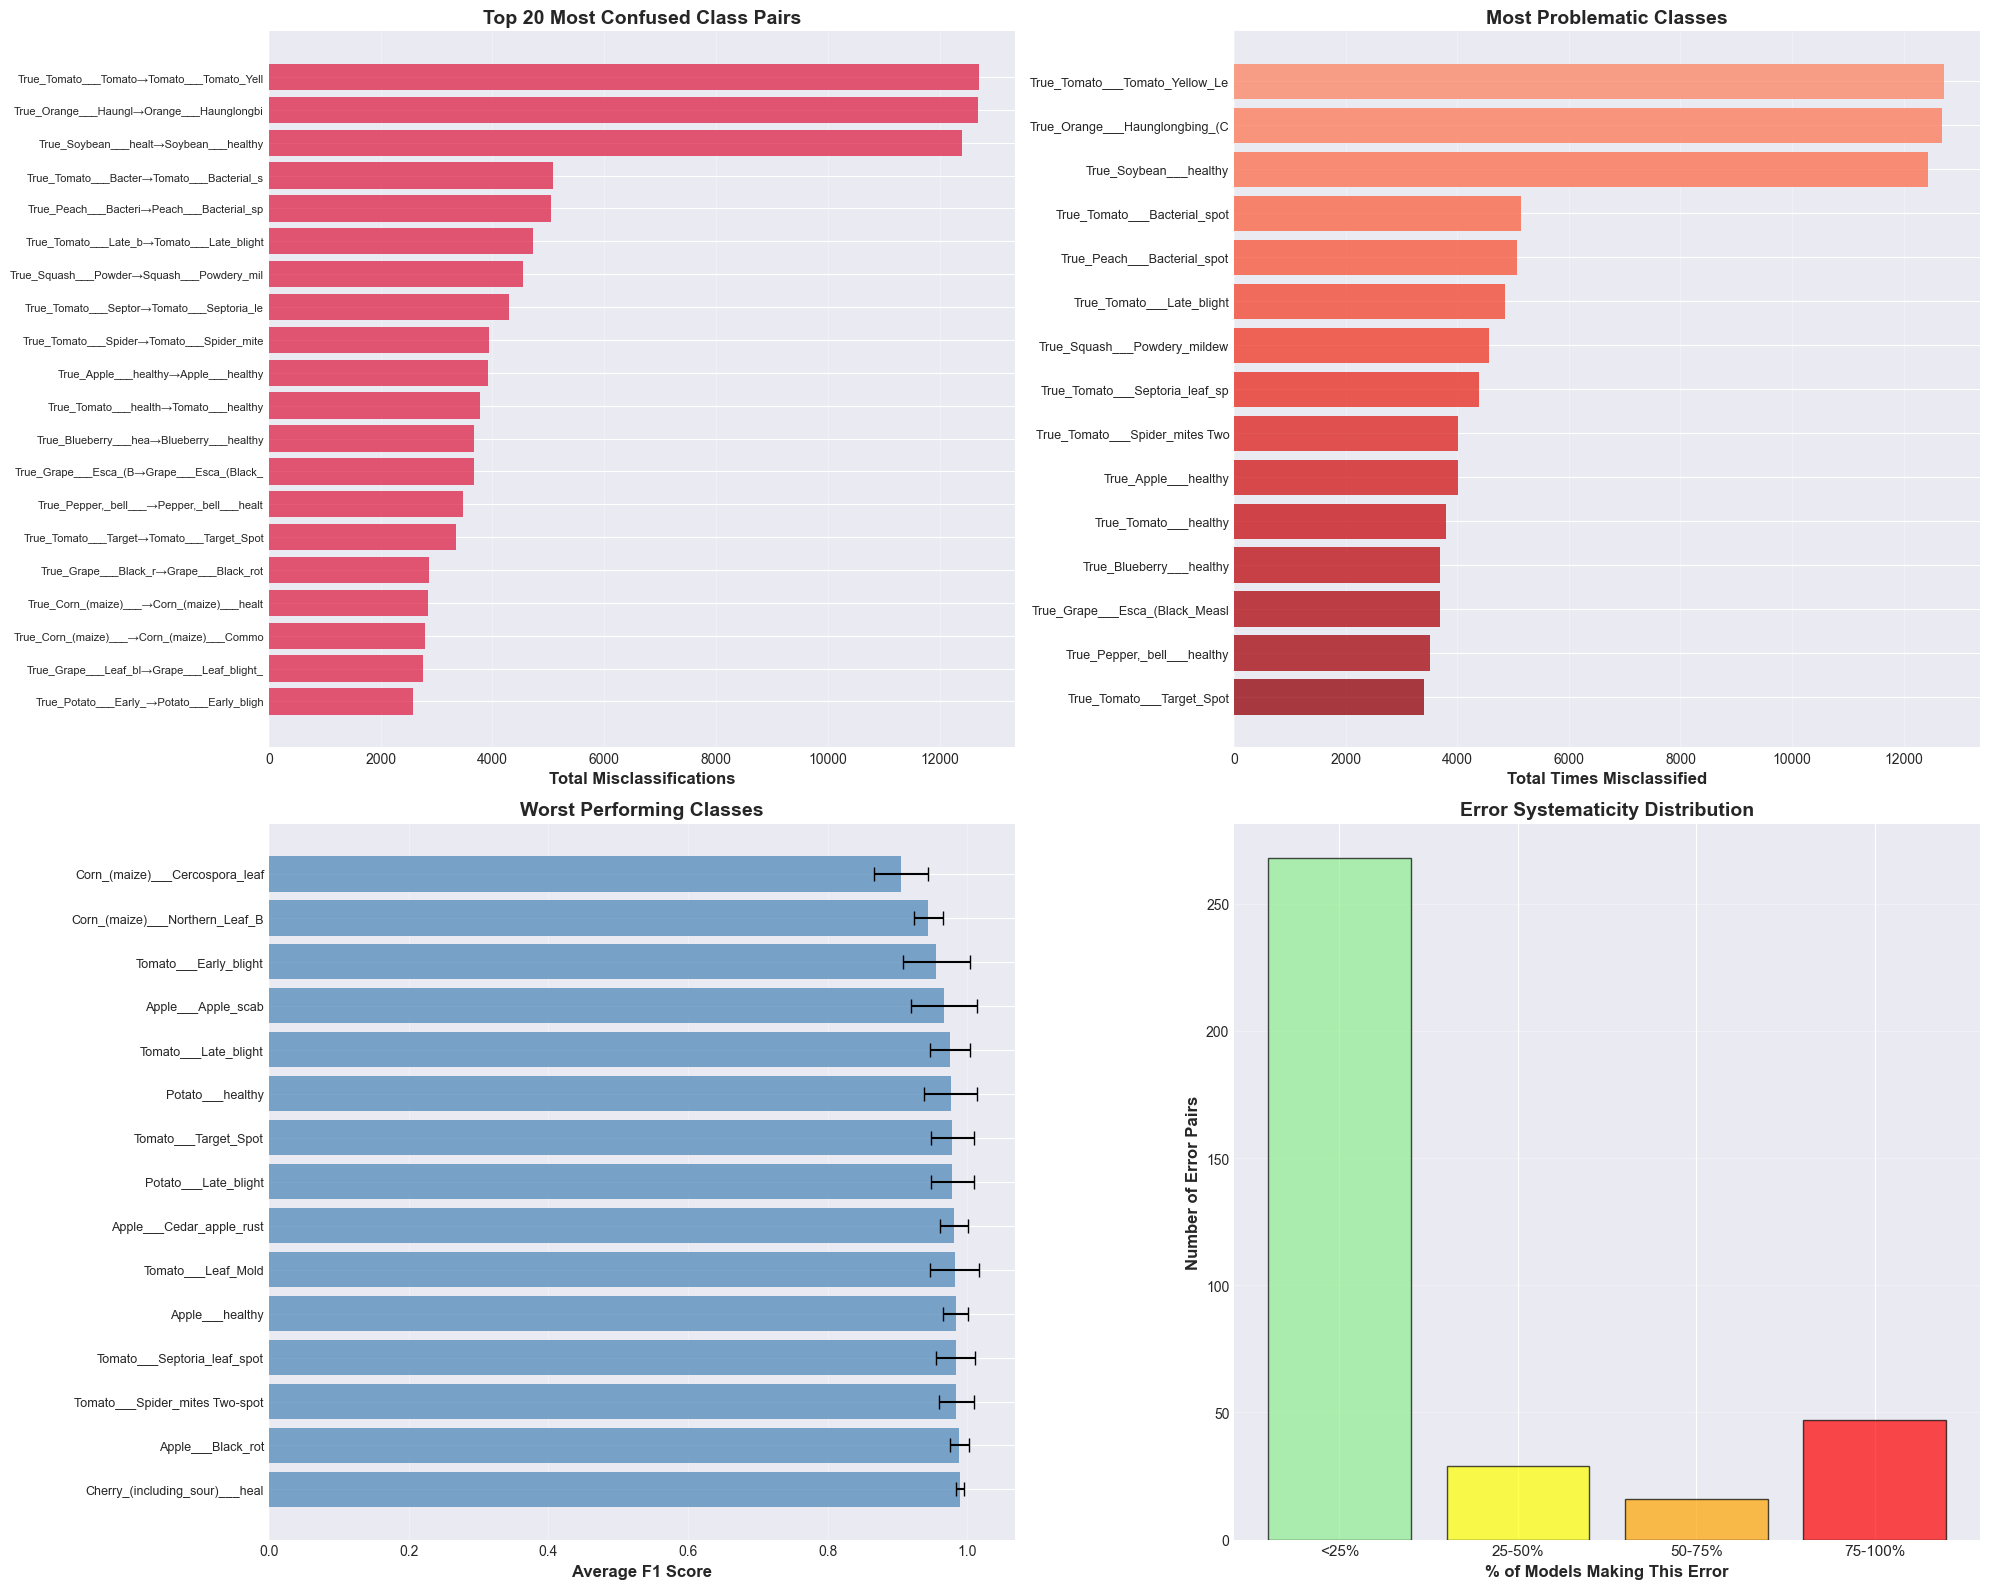

In [6]:
# Create Visualizations
print_subsection_header("5. CREATING VISUALIZATIONS")

fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot 1: Top confusion pairs
ax1 = axes[0, 0]
top_pairs = df_pair_totals.head(20)
y_labels = [f"{truncate_label(row['True_Class'], 20)}→{truncate_label(row['Predicted_Class'], 20)}" 
            for _, row in top_pairs.iterrows()]
ax1.barh(range(len(top_pairs)), top_pairs['Count'], color='crimson', alpha=0.7)
ax1.set_yticks(range(len(top_pairs)))
ax1.set_yticklabels(y_labels, fontsize=8)
ax1.set_xlabel('Total Misclassifications', fontsize=12, fontweight='bold')
ax1.set_title('Top 20 Most Confused Class Pairs', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')
ax1.invert_yaxis()

# Plot 2: Problematic classes
ax2 = axes[0, 1]
top_prob = class_difficulty.head(15)
colors_prob = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_prob)))
ax2.barh(range(len(top_prob)), top_prob['Total_Misclassified'], color=colors_prob, alpha=0.8)
ax2.set_yticks(range(len(top_prob)))
ax2.set_yticklabels([truncate_label(c) for c in top_prob['Class']], fontsize=9)
ax2.set_xlabel('Total Times Misclassified', fontsize=12, fontweight='bold')
ax2.set_title('Most Problematic Classes', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')
ax2.invert_yaxis()

# Plot 3: Worst F1
ax3 = axes[1, 0]
worst_15 = worst_f1.head(15)
ax3.barh(range(len(worst_15)), worst_15['F1_Mean'], 
         xerr=worst_15['F1_Std'], color='steelblue', alpha=0.7, capsize=5)
ax3.set_yticks(range(len(worst_15)))
ax3.set_yticklabels([truncate_label(c) for c in worst_15['Class']], fontsize=9)
ax3.set_xlabel('Average F1 Score', fontsize=12, fontweight='bold')
ax3.set_title('Worst Performing Classes', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')
ax3.invert_yaxis()

# Plot 4: Error systematicity
ax4 = axes[1, 1]
model_freq_bins = [0, 25, 50, 75, 100]
model_freq_labels = ['<25%', '25-50%', '50-75%', '75-100%']
error_model_count['Freq_Bin'] = pd.cut(error_model_count['Model_Percentage'], 
                                       bins=model_freq_bins, labels=model_freq_labels)
freq_dist = error_model_count['Freq_Bin'].value_counts().sort_index()
colors_freq = ['lightgreen', 'yellow', 'orange', 'red']
ax4.bar(range(len(freq_dist)), freq_dist.values, color=colors_freq, alpha=0.7, edgecolor='black')
ax4.set_xticks(range(len(freq_dist)))
ax4.set_xticklabels(freq_dist.index, fontsize=11)
ax4.set_ylabel('Number of Error Pairs', fontsize=12, fontweight='bold')
ax4.set_xlabel('% of Models Making This Error', fontsize=12, fontweight='bold')
ax4.set_title('Error Systematicity Distribution', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

save_figure('step2_error_analysis.png')
plt.show()

In [8]:
# Save Results
print_subsection_header("6. SAVING RESULTS")

save_csv(df_pair_totals.head(50), 'step2_top_confusion_pairs.csv')
save_csv(class_difficulty, 'step2_problematic_classes.csv')
if len(hard_errors) > 0:
    save_csv(hard_errors, 'step2_systematic_errors.csv')
save_csv(class_performance, 'step2_class_performance.csv')

# Summary
print_section_header("PART 2 COMPLETE!")

print(f"\nKEY FINDINGS:")
print(f"  - Total confusion pairs: {len(df_pair_totals)}")
print(f"  - Hard errors: {len(hard_errors)}")
print(f"  - Most confused: {df_pair_totals.iloc[0]['True_Class']} → {df_pair_totals.iloc[0]['Predicted_Class']}")
print(f"  - Hardest class: {class_difficulty.iloc[0]['Class']}")
print(f"  - Best ensemble candidate: {high_variance.iloc[0]['Class']}")


--------------------------------------------------------------------------------
6. SAVING RESULTS
--------------------------------------------------------------------------------
Saved CSV: F:\up_git\off_plant_di_err_analyze_daok\analyze_and_results\reports\step2_top_confusion_pairs.csv
Saved CSV: F:\up_git\off_plant_di_err_analyze_daok\analyze_and_results\reports\step2_problematic_classes.csv
Saved CSV: F:\up_git\off_plant_di_err_analyze_daok\analyze_and_results\reports\step2_systematic_errors.csv
Saved CSV: F:\up_git\off_plant_di_err_analyze_daok\analyze_and_results\reports\step2_class_performance.csv

PART 2 COMPLETE!

KEY FINDINGS:
  - Total confusion pairs: 360
  - Hard errors: 41
  - Most confused: True_Tomato___Tomato_Yellow_Leaf_Curl_Virus → Tomato___Tomato_Yellow_Leaf_Curl_Virus
  - Hardest class: True_Tomato___Tomato_Yellow_Leaf_Curl_Virus
  - Best ensemble candidate: Tomato___Early_blight
